*emphasized text*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [2]:
ghost = pd.read_csv('../input/train.csv')
ghost.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ghost.color.unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

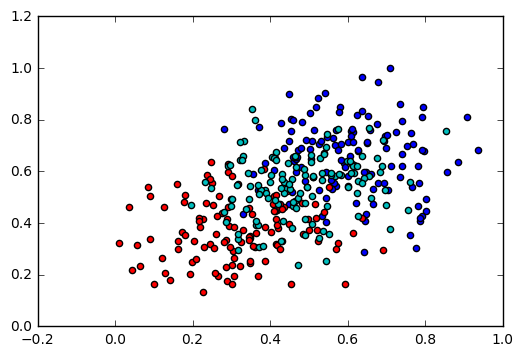

In [5]:
type_c = ['Ghoul', 'Ghost', 'Goblin']
gC = ['b','r','c','m','k','g']

for i in range(len(type_c)):
    plt.scatter(ghost[ghost.type == type_c[i]]['has_soul'], ghost[ghost.type == type_c[i]]['hair_length'], c = gC[i])
#plt.scatter(ghost[ghost.color == color[0]]['bone_length'], ghost[ghost.color == color[0]]['hair_length'], c = gC[0])
#plt.scatter(ghost[ghost.color == color[1]]['bone_length'], ghost[ghost.color == color[1]]['hair_length'], c = gC[1])

In [6]:
ghost.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [7]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')


In [8]:
X = ghost[['bone_length', 'rotting_flesh','hair_length','has_soul']]
Y = ghost.type
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
test = pd.read_csv('../input/test.csv')

test['type'] = clf.predict(test[['bone_length', 'rotting_flesh','hair_length','has_soul']])

test[['id', 'type']].to_csv('predction.csv', header = True, index_label='id')